In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghav077","key":"237a9a6c9ed1038866d2e2eb43e09dac"}'}

In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [01:31<00:00, 115MB/s] 
100% 3.58G/3.58G [01:31<00:00, 42.0MB/s]


In [4]:
!unzip -q fruits-fresh-and-rotten-for-classification.zip


In [5]:
TRAIN_PATH = '/content/dataset/train'
TEST_PATH = '/content/dataset/test'
SIZE = (240, 240)


In [8]:
import os
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshoranges', 'rottenapples', 'freshbanana', 'rottenoranges', 'freshapples', 'rottenbanana']


In [9]:
##train dataset

#fresh
fresh_apples_train_dir = os.path.join(TRAIN_PATH, 'freshapples')
fresh_banana_train_dir = os.path.join(TRAIN_PATH, 'freshbanana')
fresh_oranges_train_dir = os.path.join(TRAIN_PATH, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(TRAIN_PATH, 'rottenapples')
rotten_banana_train_dir = os.path.join(TRAIN_PATH, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(TRAIN_PATH, 'rottenoranges')

In [10]:
import os

##test dataset

#fresh
fresh_apples_test_dir = os.path.join(TEST_PATH, 'freshapples')
fresh_banana_test_dir = os.path.join(TEST_PATH, 'freshbanana')
fresh_oranges_test_dir = os.path.join(TEST_PATH, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(TEST_PATH, 'rottenapples')
rotten_banana_test_dir = os.path.join(TEST_PATH, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(TEST_PATH, 'rottenoranges')

In [11]:
fresh_apples_train_len=len(os.listdir(fresh_apples_train_dir))
fresh_banana_train_len=len(os.listdir(fresh_banana_train_dir))
fresh_oranges_train_len=len(os.listdir(fresh_oranges_train_dir))
rotten_apples_train_len=len(os.listdir(rotten_apples_train_dir))
rotten_banana_train_len=len(os.listdir(rotten_banana_train_dir))
rotten_oranges_train_len=len(os.listdir(rotten_oranges_train_dir))

# Train Dataset

print("Images of Training Dataset")
print("No. of train fresh apple images : ", fresh_apples_train_len)
print("No. of train fresh banana images : ", fresh_banana_train_len)
print("No. of train fresh orange images : ", fresh_oranges_train_len)
print("No. of train rotten apple images : ", rotten_apples_train_len)
print("No. of train rotten banana images : ", rotten_banana_train_len)
print("No. of train rotten orange images : ", rotten_oranges_train_len)

Images of Training Dataset
No. of train fresh apple images :  1693
No. of train fresh banana images :  1581
No. of train fresh orange images :  1466
No. of train rotten apple images :  2342
No. of train rotten banana images :  2224
No. of train rotten orange images :  1595


In [12]:
# Test Dataset

print("Images of Testing Dataset")
print("No. of test fresh apple images : ", len(os.listdir(fresh_apples_test_dir)))
print("No. of test fresh banana images : ", len(os.listdir(fresh_banana_test_dir)))
print("No. of test fresh orange images : ", len(os.listdir(fresh_oranges_test_dir)))
print("No. of test rotten apple images : ", len(os.listdir(rotten_apples_test_dir)))
print("No. of test rotten banana images : ", len(os.listdir(rotten_banana_test_dir)))
print("No. of test rotten orange images : ", len(os.listdir(rotten_oranges_test_dir)))

Images of Testing Dataset
No. of test fresh apple images :  395
No. of test fresh banana images :  381
No. of test fresh orange images :  388
No. of test rotten apple images :  601
No. of test rotten banana images :  530
No. of test rotten orange images :  403


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


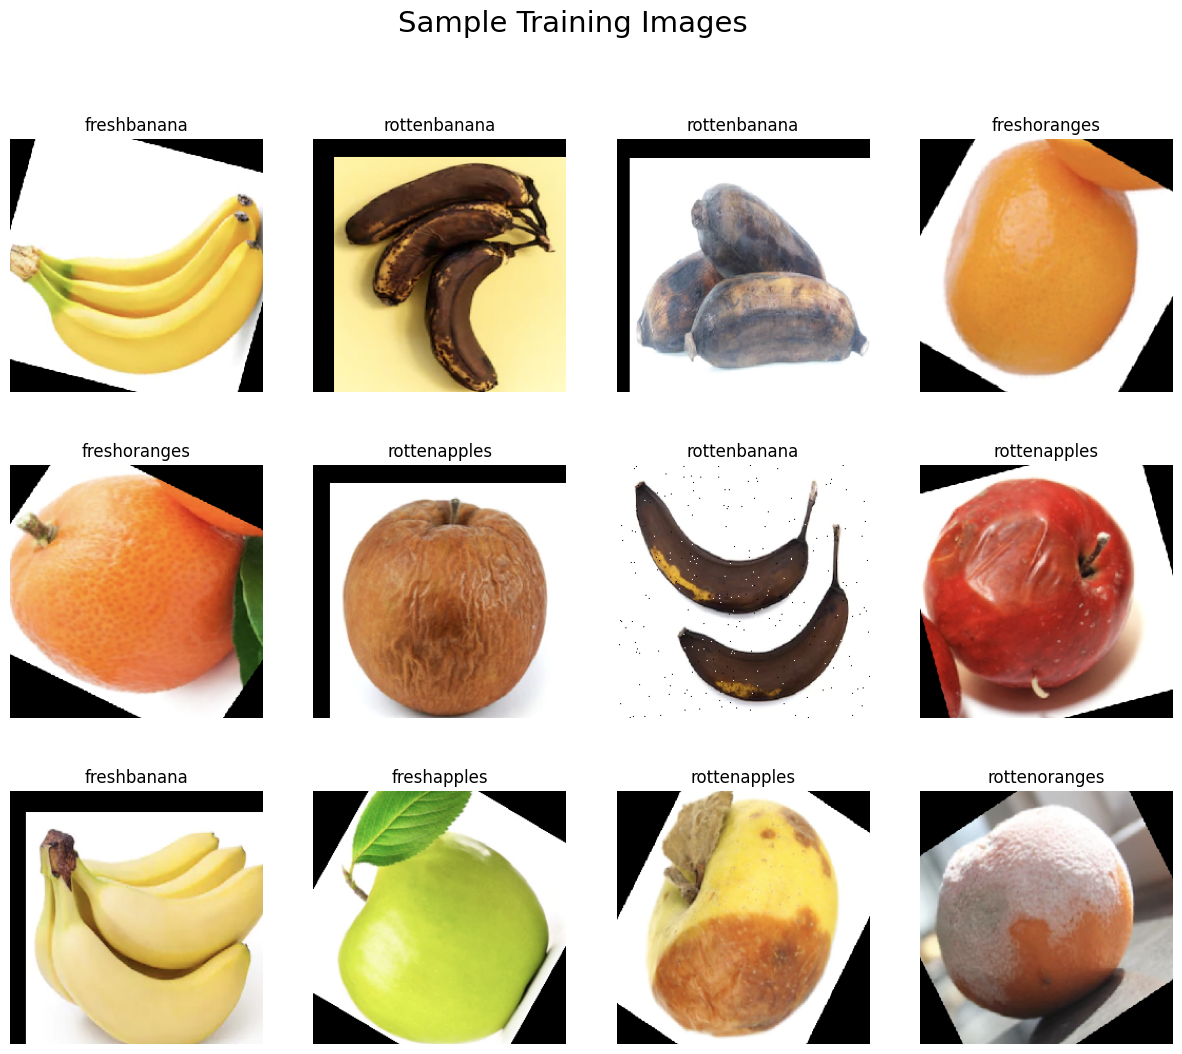

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [17]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    print("the size of a image",image.shape)
    plt.imshow(image)

the size of a image (402, 380, 3)


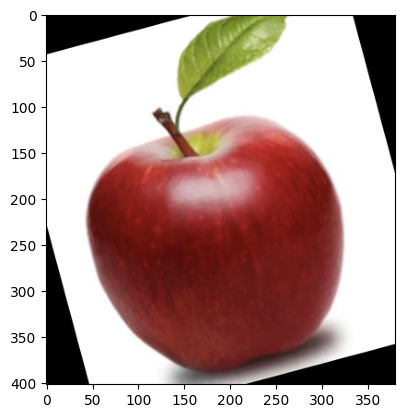

In [18]:
import matplotlib.image as mpimg
#Fresh example:
show_image('/content/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.11.41 PM.png')

the size of a image (286, 282, 3)


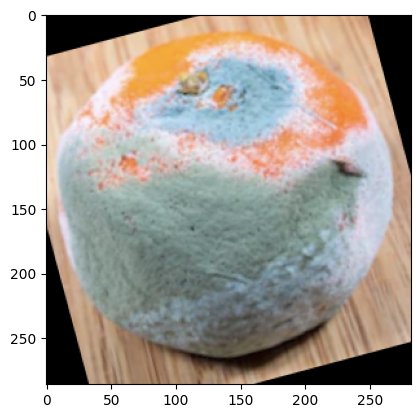

In [19]:
#Rotten example:
show_image('/content/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.22.58 PM.png')

In [20]:


import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In [21]:


model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,947,078 (49.39 MB)

 Trainable params: 12,947,078 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4955 - loss: 1.7590

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


307/307 ━━━━━━━━━━━━━━━━━━━━ 1412s 5s/step - accuracy: 0.4961 - loss: 1.7563 - val_accuracy: 0.8438 - val_loss: 0.4509
Epoch 2/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1493s 5s/step - accuracy: 0.8678 - loss: 0.3751 - val_accuracy: 0.9026 - val_loss: 0.2608
Epoch 3/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1406s 5s/step - accuracy: 0.9043 - loss: 0.2595 - val_accuracy: 0.9237 - val_loss: 0.2132
Epoch 4/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1471s 5s/step - accuracy: 0.9278 - loss: 0.1994 - val_accuracy: 0.9329 - val_loss: 0.2080
Epoch 5/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1450s 5s/step - accuracy: 0.9556 - loss: 0.1269 - val_accuracy: 0.9568 - val_loss: 0.1312
Epoch 6/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1402s 5s/step - accuracy: 0.9665 - loss: 0.1018 - val_accuracy: 0.9154 - val_loss: 0.2165
Epoch 7/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1414s 5s/step - accuracy: 0.9616 - loss: 0.1030 - val_accuracy: 0.9550 - val_loss: 0.1255
Epoch 8/12
307/307 ━━━━━━━━━━━━━━━━━━━━ 1402s 5s/step - accuracy: 0.9744 - loss: 0.0687 - val_accurac

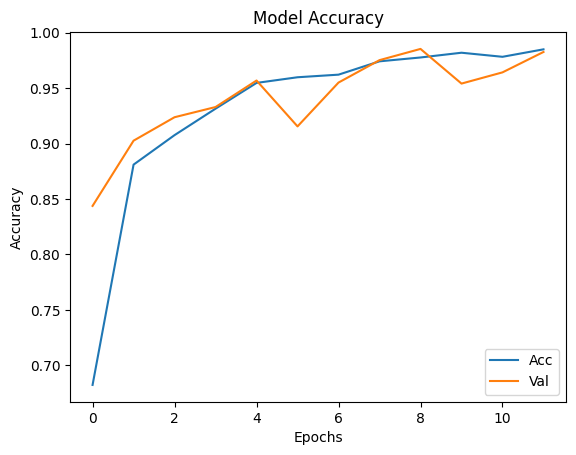

In [26]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

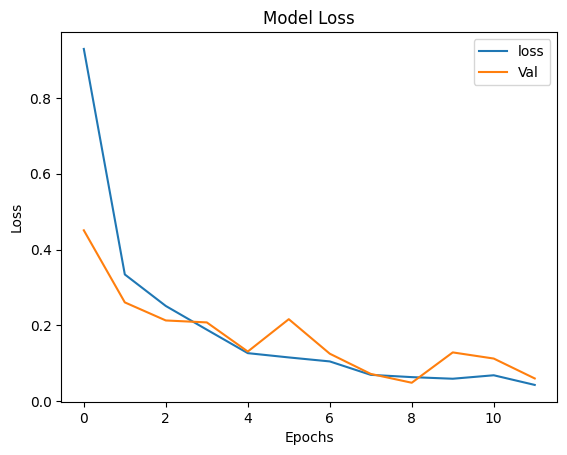

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 6 classes.
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 133s 49ms/step - accuracy: 0.9594 - loss: 0.1129
accuracy test:  0.9588584303855896
loss test:  0.11687538772821426


In [29]:

predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]

2698/2698 ━━━━━━━━━━━━━━━━━━━━ 119s 44ms/step


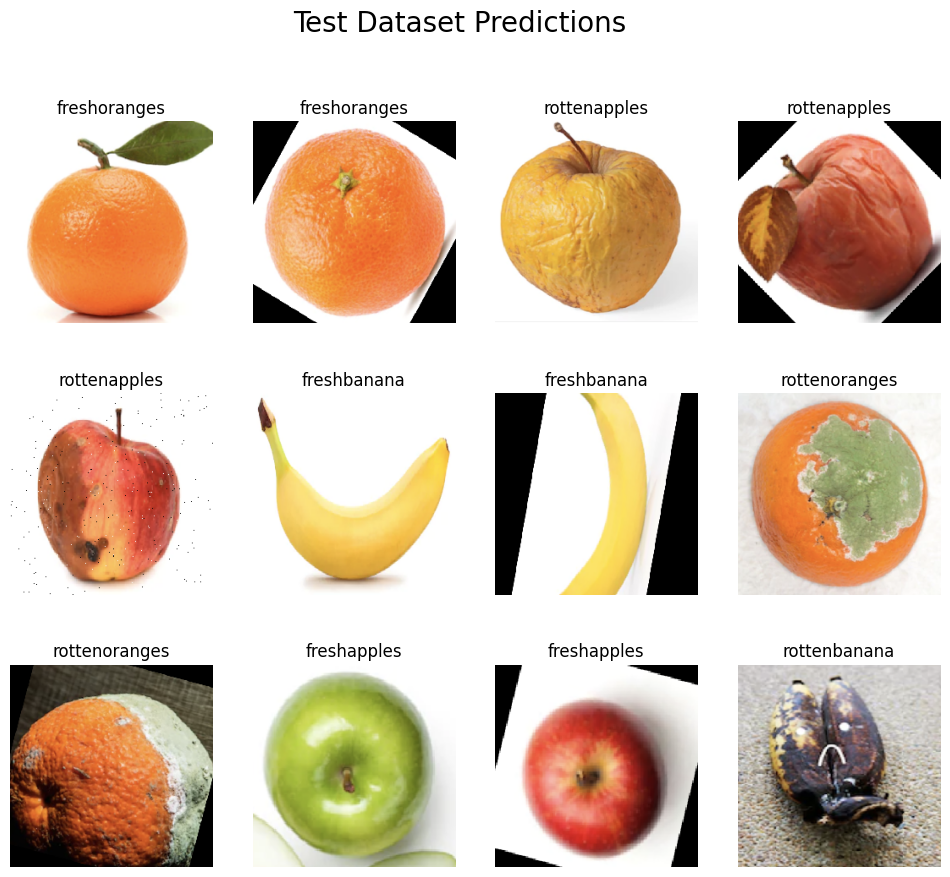

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [31]:
model.save("model1.h5")